In [1]:
import pandas as pd
from cluster_comparison import perform_umap, perform_hdbscan, calculate_silhouette
import random
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from joblib import Parallel, delayed

/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d

In [2]:
# Sample data and demographics DataFrames, replace these with your actual DataFrames
raw_data = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/cleaned_data_SYMPTOMS_9_13_23_DNA.csv')
data_symp_groups = pd.read_csv('data/skew_corr_groupadd.csv', usecols=['Grouped_Neuro_Sensory', 'Grouped_Cognitive_Memory', 'Grouped_Gastrointestinal', 'Grouped_Respiratory_Cardiac', 'Grouped_Eye_Vision'])
data_symp_groups_all = pd.read_csv('data/skew_corr_groupadd.csv')
demographics = pd.read_csv('/Users/leo/Programming/PLR/Leo/data/non_binary_data_processed.csv')

# combine demographics and data_symp_group_all 
demo_all = pd.concat([demographics, data_symp_groups_all], axis=1)

# combine demographics and data_symp_group
demo_groups = pd.concat([demographics, data_symp_groups], axis=1)

Generations:   0%|          | 0/20 [00:00<?, ?it/s]/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programm


Top 5 individuals in generation 1:
  Genome: (32, 0.4091434592765901, 33, 14), Fitness: 0.6534421443939209
    n_neighbors=32, min_dist=0.4091434592765901, min_cluster_size=33, n_components=14
  Genome: (44, 0.5343993466370958, 37, 20), Fitness: 0.649019181728363
    n_neighbors=44, min_dist=0.5343993466370958, min_cluster_size=37, n_components=20
  Genome: (32, 0.29253304855880025, 22, 15), Fitness: 0.6455193758010864
    n_neighbors=32, min_dist=0.29253304855880025, min_cluster_size=22, n_components=15
  Genome: (33, 0.28201552919359624, 23, 15), Fitness: 0.6392368674278259
    n_neighbors=33, min_dist=0.28201552919359624, min_cluster_size=23, n_components=15
  Genome: (35, 0.4425221106753738, 24, 13), Fitness: 0.6369181275367737
    n_neighbors=35, min_dist=0.4425221106753738, min_cluster_size=24, n_components=13
Number of mutations: 6


Generations:  10%|█         | 2/20 [05:30<48:08, 160.45s/it]  


Top 5 individuals in generation 2:
  Genome: (32, 0.4091434592765901, 33, 14), Fitness: 0.6534421443939209
    n_neighbors=32, min_dist=0.4091434592765901, min_cluster_size=33, n_components=14
  Genome: (34, 0.3508028783895576, 39, 20), Fitness: 0.652501106262207
    n_neighbors=34, min_dist=0.3508028783895576, min_cluster_size=39, n_components=20
  Genome: (18, 0.6562310777685322, 41, 22), Fitness: 0.6450711488723755
    n_neighbors=18, min_dist=0.6562310777685322, min_cluster_size=41, n_components=22
  Genome: (40, 0.39448505625786595, 30, 15), Fitness: 0.6437053084373474
    n_neighbors=40, min_dist=0.39448505625786595, min_cluster_size=30, n_components=15
  Genome: (26, 0.3508028783895576, 41, 22), Fitness: 0.6436739563941956
    n_neighbors=26, min_dist=0.3508028783895576, min_cluster_size=41, n_components=22
Number of mutations: 12


Generations:  15%|█▌        | 3/20 [07:47<42:28, 149.91s/it]


Top 5 individuals in generation 3:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 38, 22), Fitness: 0.6710509061813354
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=38, n_components=22
  Genome: (32, 0.4091434592765901, 33, 14), Fitness: 0.6534421443939209
    n_neighbors=32, min_dist=0.4091434592765901, min_cluster_size=33, n_components=14
  Genome: (34, 0.3508028783895576, 39, 20), Fitness: 0.652501106262207
    n_neighbors=34, min_dist=0.3508028783895576, min_cluster_size=39, n_components=20
  Genome: (18, 0.6562310777685322, 41, 22), Fitness: 0.6450711488723755
    n_neighbors=18, min_dist=0.6562310777685322, min_cluster_size=41, n_components=22
Number of mutations: 4


Generations:  20%|██        | 4/20 [09:44<36:28, 136.76s/it]


Top 5 individuals in generation 4:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.6562310777685322, 41, 6), Fitness: 0.6619357466697693
    n_neighbors=18, min_dist=0.6562310777685322, min_cluster_size=41, n_components=6
  Genome: (11, 0.20609596000132982, 41, 22), Fitness: 0.6483051776885986
    n_neighbors=11, min_dist=0.20609596000132982, min_cluster_size=41, n_components=22
  Genome: (18, 0.6562310777685322, 41, 22), Fitness: 0.6450711488723755
    n_neighbors=18, min_dist=0.6562310777685322, min_cluster_size=41, n_components=22
  Genome: (18, 0.6562310777685322, 41, 22), Fitness: 0.6450711488723755
    n_neighbors=18, min_dist=0.6562310777685322, min_cluster_size=41, n_components=22
Number of mutations: 13


Generations:  25%|██▌       | 5/20 [11:45<32:47, 131.18s/it]


Top 5 individuals in generation 5:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 41, 20), Fitness: 0.6736928224563599
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=41, n_components=20
  Genome: (18, 0.6562310777685322, 41, 22), Fitness: 0.6450711488723755
    n_neighbors=18, min_dist=0.6562310777685322, min_cluster_size=41, n_components=22
  Genome: (36, 0.7258194656364441, 38, 6), Fitness: 0.6444602012634277
    n_neighbors=36, min_dist=0.7258194656364441, min_cluster_size=38, n_components=6
Number of mutations: 10


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d


Top 5 individuals in generation 6:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 41, 20), Fitness: 0.6736928224563599
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=41, n_components=20
  Genome: (40, 0.20609596000132982, 38, 6), Fitness: 0.6690969467163086
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=38, n_components=6
  Genome: (11, 0.20609596000132982, 38, 15), Fitness: 0.6649202108383179
    n_neighbors=11, min_dist=0.20609596000132982, min_cluster_size=38, n_components=15
  Genome: (18, 0.20609596000132982, 38, 17), Fitness: 0.6606960892677307
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=38, n_components=17
Number of mutations: 12


Generations:  35%|███▌      | 7/20 [16:22<29:12, 134.80s/it]


Top 5 individuals in generation 7:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (18, 4, 45, 6), Fitness: 0.6223582625389099
    n_neighbors=18, min_dist=4, min_cluster_size=45, n_components=6
  Genome: (18, 4, 41, 15), Fitness: 0.5968093276023865
    n_neighbors=18, min_dist=4, min_cluster_size=41, n_components=15
Number of mutations: 13


Generations:  40%|████      | 8/20 [18:35<26:50, 134.20s/it]


Top 5 individuals in generation 8:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 4, 23, 6), Fitness: 0.6803431510925293
    n_neighbors=18, min_dist=4, min_cluster_size=23, n_components=6
  Genome: (40, 14, 45, 6), Fitness: 0.6483440399169922
    n_neighbors=40, min_dist=14, min_cluster_size=45, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
Number of mutations: 8


Generations:  45%|████▌     | 9/20 [21:06<25:35, 139.59s/it]


Top 5 individuals in generation 9:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
Number of mutations: 8


Generations:  50%|█████     | 10/20 [24:04<25:12, 151.27s/it]


Top 5 individuals in generation 10:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (40, 41, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=41, min_cluster_size=38, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
Number of mutations: 16


Generations:  55%|█████▌    | 11/20 [26:48<23:15, 155.10s/it]


Top 5 individuals in generation 11:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (40, 0.24890629295663746, 38, 15), Fitness: 0.6527329087257385
    n_neighbors=40, min_dist=0.24890629295663746, min_cluster_size=38, n_components=15
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
  Genome: (40, 14, 38, 6), Fitness: 0.6403877139091492
    n_neighbors=40, min_dist=14, min_cluster_size=38, n_components=6
Number of mutations: 15


Generations:  60%|██████    | 12/20 [29:30<20:58, 157.35s/it]


Top 5 individuals in generation 12:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (0.3048274311766477, 14, 0.8112292703452796, 15), Fitness: 0.6501136422157288
    n_neighbors=0.3048274311766477, min_dist=14, min_cluster_size=0.8112292703452796, n_components=15
  Genome: (40, 14, 28, 6), Fitness: 0.6344756484031677
    n_neighbors=40, min_dist=14, min_cluster_size=28, n_components=6
  Genome: (40, 14, 30, 12), Fitness: 0.6215342283248901
    n_neighbors=40, min_dist=14, min_cluster_size=30, n_components=12
  Genome: (40, 14, 30, 12), Fitness: 0.6215342283248901
    n_neighbors=40, min_dist=14, min_cluster_size=30, n_components=12
Number of mutations: 14


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
Generations:  65%|██████▌   | 13/20 [31:50<17:43, 151.93s/it]


Top 5 individuals in generation 13:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (0.3048274311766477, 0.20609596000132982, 30, 15), Fitness: 0.651601254940033
    n_neighbors=0.3048274311766477, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (0.3048274311766477, 14, 0.8112292703452796, 15), Fitness: 0.6449204683303833
    n_neighbors=0.3048274311766477, min_dist=14, min_cluster_size=0.8112292703452796, n_components=15
Number of mutations: 12


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/spectral.py:260: UserWarning: WARNING: spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value f


Top 5 individuals in generation 14:
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (0.3048274311766477, 14, 0.8112292703452796, 15), Fitness: 0.6394630670547485
    n_neighbors=0.3048274311766477, min_dist=14, min_cluster_size=0.8112292703452796, n_components=15
  Genome: (40, 14, 30, 12), Fitness: 0.6215342283248901
    n_neighbors=40, min_dist=14, min_cluster_size=30, n_components=12
  Genome: (40, 42, 30, 12), Fitness: 0.6215342283248901
    n_neighbors=40, min_dist=42, min_cluster_size=30, n_components=12
  Genome: (40, 14, 30, 6), Fitness: 0.6126372814178467
    n_neighbors=40, min_dist=14, min_cluster_size=30, n_components=6
Number of mutations: 13


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d


Top 5 individuals in generation 15:
  Genome: (0.3048274311766477, 0.20609596000132982, 30, 15), Fitness: 0.681515097618103
    n_neighbors=0.3048274311766477, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (40, 14, 48, 6), Fitness: 0.6638833284378052
    n_neighbors=40, min_dist=14, min_cluster_size=48, n_components=6
Number of mutations: 1


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d


Top 5 individuals in generation 16:
  Genome: (0.3048274311766477, 0.20609596000132982, 30, 15), Fitness: 0.7153910994529724
    n_neighbors=0.3048274311766477, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (40, 0.20609596000132982, 30, 6), Fitness: 0.6588167548179626
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
  Genome: (40, 14, 30, 6), Fitness: 0.6126372814178467
    n_neighbors=40, min_dist=14, min_cluster_size=30, n_components=6
  Genome: (40, 10, 30, 6), Fitness: 0.6126372814178467
    n_neighbors=40, min_dist=10, min_cluster_size=30, n_components=6
Number of mutations: 4


Generations:  85%|████████▌ | 17/20 [39:51<06:18, 126.22s/it]


Top 5 individuals in generation 17:
  Genome: (0.3048274311766477, 0.20609596000132982, 30, 15), Fitness: 0.7175283432006836
    n_neighbors=0.3048274311766477, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (18, 0.20609596000132982, 30, 15), Fitness: 0.6803690195083618
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (40, 0.20609596000132982, 30, 6), Fitness: 0.6588167548179626
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
  Genome: (40, 0.20609596000132982, 30, 6), Fitness: 0.6588167548179626
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
  Genome: (40, 0.20609596000132982, 30, 6), Fitness: 0.6588167548179626
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
Number of mutations: 6


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d


Top 5 individuals in generation 18:
  Genome: (0.3048274311766477, 0.20609596000132982, 30, 15), Fitness: 0.6952118277549744
    n_neighbors=0.3048274311766477, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (40, 0.20609596000132982, 30, 6), Fitness: 0.6588167548179626
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
  Genome: (40, 0.20609596000132982, 30, 6), Fitness: 0.6588167548179626
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
  Genome: (40, 10, 30, 6), Fitness: 0.6126372814178467
    n_neighbors=40, min_dist=10, min_cluster_size=30, n_components=6
  Genome: (40, 14, 30, 6), Fitness: 0.6126372814178467
    n_neighbors=40, min_dist=14, min_cluster_size=30, n_components=6
Number of mutations: 6


/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/leo/Programming/PLR/Leo/env/lib/python3.11/site-packages/umap/d


Top 5 individuals in generation 19:
  Genome: (0.3048274311766477, 0.20609596000132982, 30, 15), Fitness: 0.6846258640289307
    n_neighbors=0.3048274311766477, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
  Genome: (40, 0.20609596000132982, 30, 6), Fitness: 0.6588167548179626
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
  Genome: (40, 0.20609596000132982, 30, 6), Fitness: 0.6588167548179626
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
  Genome: (18, 0.20609596000132982, 30, 10), Fitness: 0.6552243828773499
    n_neighbors=18, min_dist=0.20609596000132982, min_cluster_size=30, n_components=10
  Genome: (40, 14, 30, 6), Fitness: 0.6126372814178467
    n_neighbors=40, min_dist=14, min_cluster_size=30, n_components=6
Number of mutations: 11


Generations: 100%|██████████| 20/20 [45:02<00:00, 135.11s/it]


Top 5 individuals in generation 20:
  Genome: (17, 0.20609596000132982, 30, 6), Fitness: 0.676801860332489
    n_neighbors=17, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
  Genome: (40, 0.20609596000132982, 30, 10), Fitness: 0.668157160282135
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=10
  Genome: (40, 0.20609596000132982, 30, 10), Fitness: 0.668157160282135
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=10
  Genome: (40, 0.20609596000132982, 30, 10), Fitness: 0.668157160282135
    n_neighbors=40, min_dist=0.20609596000132982, min_cluster_size=30, n_components=10
  Genome: (0.3048274311766477, 0.20609596000132982, 30, 15), Fitness: 0.6607688069343567
    n_neighbors=0.3048274311766477, min_dist=0.20609596000132982, min_cluster_size=30, n_components=15
Number of mutations: 9



Best parameters found:
  n_neighbors=17, min_dist=0.20609596000132982, min_cluster_size=30, n_components=6
Best silhouette score: 0.676801860332489


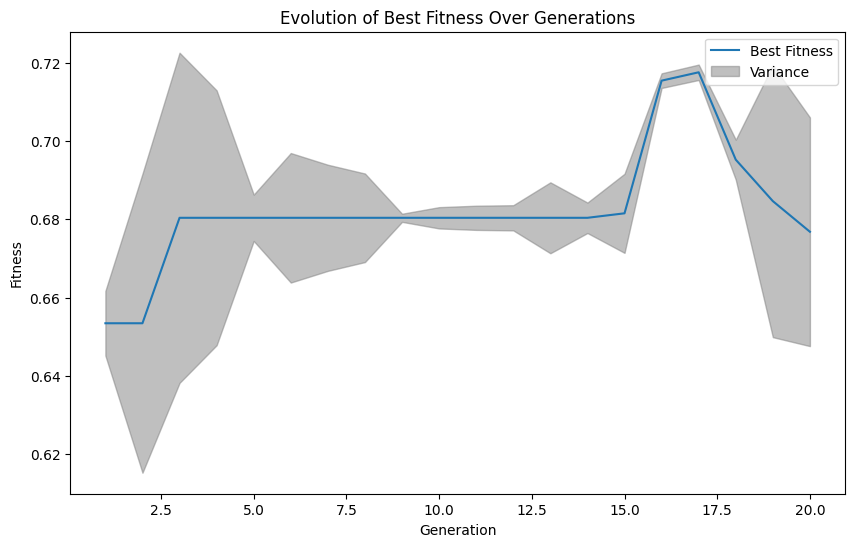

In [3]:
# Initialize variables for adaptive mutation
last_best_fitness = -1
increased_mutation_rate = 0.2

# Fitness function
def fitness(params):
    n_neighbors, min_dist, min_cluster_size, n_components = params
    
    # Validate n_neighbors
    n_neighbors = max(2, int(n_neighbors))  # Ensure n_neighbors is an integer and greater than 1
    
    min_cluster_size = max(2, int(min_cluster_size))
    n_components = max(2, int(n_components))
    min_dist = min(min_dist, 1.0)
    
    dataset_name, dataset = random.choice(list(datasets.items()))
    dataset = dataset.dropna()
    umap_result = perform_umap(dataset, n_neighbors=n_neighbors, min_dist=min_dist, n_components=n_components)
    labels = perform_hdbscan(umap_result, min_cluster_size=min_cluster_size)
    score = calculate_silhouette(umap_result, labels)
    return score

# Datasets to consider
datasets = {'data_symp_groups_all': data_symp_groups_all}  # Replace with your actual dataset

# Genetic Algorithm Parameters
population_size = 50
n_generations = 20
selection_rate = 0.3
mutation_rate = 0.05

# Initialize population
population = []
for _ in range(population_size // 4):
    population.append(0.3048274311766477, 0.20609596000132982, 30, 15)
    population.append((random.randint(21, 35), random.uniform(0.26, 0.5), random.randint(21, 35), random.randint(11, 18)))
    population.append((random.randint(36, 45), random.uniform(0.51, 0.75), random.randint(36, 45), random.randint(19, 22)))
    population.append((random.randint(46, 50), random.uniform(0.76, 1.0), random.randint(46, 50), random.randint(23, 25)))

# To store best fitness and variance for each generation
best_fitnesses = []
variances = []

# Main GA loop
for generation in tqdm(range(n_generations), desc="Generations"):
    # Evaluate fitness of each individual in parallel using joblib
    scores = Parallel(n_jobs=-1)(delayed(fitness)(ind) for ind in population)
    
    # Store best fitness and variance
    best_fitness = max(scores)
    best_fitnesses.append(best_fitness)
    variances.append(np.var(scores))
    
    # Adaptive mutation rate
    if best_fitness <= last_best_fitness:
        mutation_rate = increased_mutation_rate
    else:
        mutation_rate = 0.1
    last_best_fitness = best_fitness
    
    # Elitism: Keep the best individual
    best_idx = scores.index(best_fitness)
    best_individual = population[best_idx]
    
    # Print the top 5 individuals
    top5_idx = sorted(range(len(scores)), key=lambda i: scores[i], reverse=True)[:5]
    print(f"\nTop 5 individuals in generation {generation+1}:")
    for i in top5_idx:
        print(f"  Genome: {population[i]}, Fitness: {scores[i]}")
        print(f"    n_neighbors={population[i][0]}, min_dist={population[i][1]}, min_cluster_size={population[i][2]}, n_components={population[i][3]}")
    
    # Roulette wheel selection
    fitness_sum = sum(scores)
    selected_population = []
    for _ in range(int(selection_rate * population_size)):
        pick = random.uniform(0, fitness_sum)
        current = 0
        for i in range(len(scores)):
            current += scores[i]
            if current > pick:
                selected_population.append(population[i])
                break
    
    # Crossover (mate) the selected individuals
    children = []
    while len(children) < population_size - len(selected_population) - 1:
        parent1, parent2 = random.sample(selected_population, 2)
        crossover_point = random.randint(1, len(parent1) - 1)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        children.append(child)
    
    # Mutation
    mutations = 0
    for i in range(len(children)):
        if random.random() < mutation_rate:
            mutations += 1
            mutate_pos = random.randint(0, len(children[i]) - 1)
            new_value = random.choice([
                random.randint(5, 50),
                random.uniform(0.0, 1.0),
                random.randint(5, 50),
                random.randint(2, 25)
            ])
            children[i] = children[i][:mutate_pos] + (new_value,) + children[i][mutate_pos+1:]
    
    print(f"Number of mutations: {mutations}")
    
    # Create new population
    population = selected_population + children

    # Add the best individual back into the population
    population.append(best_individual)

# Evaluate the final population and find the best individual
final_scores = Parallel(n_jobs=-1)(delayed(fitness)(ind) for ind in population)
best_idx = max(range(len(final_scores)), key=lambda i: final_scores[i])
best_individual = population[best_idx]

# Print best parameters and silhouette score
print("\nBest parameters found:")
print(f"  n_neighbors={best_individual[0]}, min_dist={best_individual[1]}, min_cluster_size={best_individual[2]}, n_components={best_individual[3]}")
print(f"Best silhouette score: {final_scores[best_idx]}")

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, n_generations + 1), best_fitnesses, label='Best Fitness')
plt.fill_between(range(1, n_generations + 1), 
                np.array(best_fitnesses) - np.array(variances), 
                np.array(best_fitnesses) + np.array(variances), 
                color='gray', alpha=0.5, label='Variance')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of Best Fitness Over Generations')
plt.legend()
plt.show()
